In [1]:
from capsa import MVEWrapper
import tensorflow as tf
from tensorflow import keras
from keras import layers
from helper import * 

In [2]:
(x_train, y_train), (x_test, y_test) = generate_moon_data_classification()

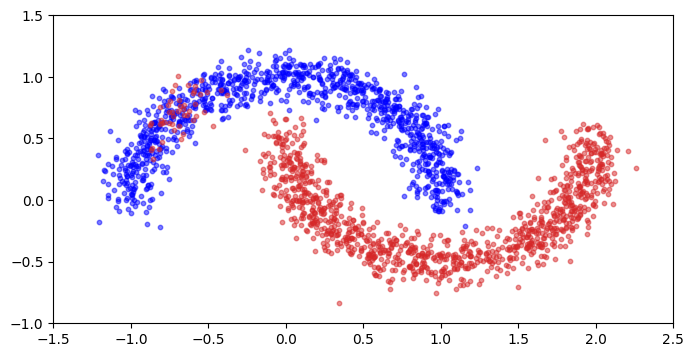

In [3]:
plot_for_moons(x_train, y_train)

In [39]:
model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=(2,)),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(2,"sigmoid"),
        ]
    )

In [40]:
wrapped_model = MVEWrapper(model)

In [41]:
wrapped_model.compile(
            optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy()]
                     )

In [42]:
wrapped_model.fit(x_train,tf.one_hot(y_train,2),epochs=50)

Epoch 1/50
(None, 2)
(None, 2)
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.3603 - mve_binary_accuracy: 0.7825
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.0813 - mve_binary_accuracy: 0.9531
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.0787 - mve_binary_accuracy: 0.9548
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.0759 - mve_binary_accuracy: 0.9553
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.0752 - mve_binary_accuracy: 0.9557
Epoch 6/50
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.0734 - mve_binary_accuracy: 0.9561
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - mve_loss: 0.0736 - mve_binary_accuracy: 0.9575
Epoch 8/50
1313/1313 [==============================] - 2s 2ms/step - mve_loss: 0.0740 - mve_binary_accuracy: 0.9584
Epoch 9/50
1313/1313 [======================

In [43]:
mesh_grid = get_grid()
output = wrapped_model(mesh_grid)

In [44]:
reduced_aleatoric = tf.reduce_mean(output.aleatoric,axis=1)

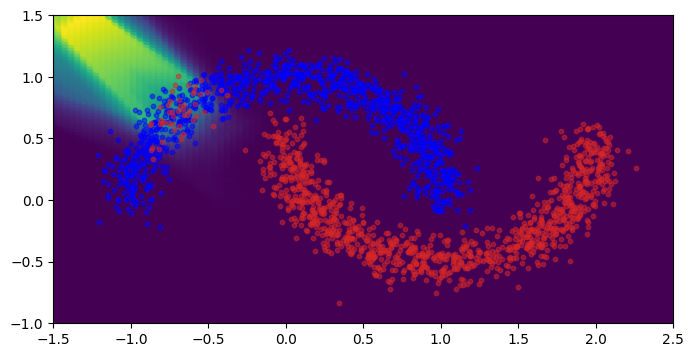

In [48]:
plt.figure(figsize=(8,4))
plt.xlim(-1.5, 2.5); plt.ylim(-1, 1.5)
i = y_train == 0
plt.scatter(x_train[i,0][::20], x_train[i,1][::20], s=10, alpha=0.5, c="b",zorder=-1)
plt.scatter(x_train[~i,0][::20], x_train[~i,1][::20], s=10, alpha=0.5, c='#d62728', zorder=-1)

plt.scatter(mesh_grid[:,0],mesh_grid[:,1],c=output.aleatoric[:,1],zorder=-2)

In [12]:
mesh_grid.shape

(10000, 2)